In [139]:
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt

# loading the data set

In [140]:
dataset = datasets.load_iris()
data = dataset.data[:, [0, 2]]  # assigning the features data
data_class = dataset.target  # assigning the label data
remaining_features = dataset.data[:, [1, 3]]

# random shuffling the data

In [141]:
data, data_class, remaining_features = shuffle(data, data_class, remaining_features)

# loading the classifier

In [142]:
model = GaussianNB()

# splitting the data into train,validate, test samples

In [143]:
def split(features, label, valRatio, testRatio):
    # getting the samples sizes
    testSample = int(len(label) * testRatio)
    validationSample = int(len(label) * valRatio + testSample)

    # splitting the data into 3 samples
    x_test, y_test = features[: testSample], label[: testSample]
    x_validation, y_validation = features[testSample: validationSample], label[testSample: validationSample]
    x_train, y_train = features[validationSample:], label[validationSample:]

    # returning samples
    return x_train, y_train, x_test, y_test, x_validation, y_validation

#  train the model

In [144]:
def train(xtrain, ytrain):
    model.fit(xtrain, ytrain)

# validate the model and trying to increase the accuracy

In [145]:
def validate(xvalidation, yvalidation):
    model.fit(xvalidation, yvalidation)

# test the model used

In [146]:
def test(xtest):
    predicted_results = model.predict(xtest)
    return predicted_results

# calculate model accuracy

In [147]:
def calc_accuracy(predicted, original):
    cnt = 0
    for i in range(len(predicted)):
        if predicted[i] == original[i]:
            cnt += 1
    print("Accuracy = ", cnt / len(original) * 100)

In [148]:
def train_validate_test_split(features, labels, testRatio=0.3, valRatio=0.3):
    # first we split the data into 3 sets:
    # 1) train dataset to train our model (x_train, y_train)
    # 2) validation dataset to improve model's accuracy (x_validation, y_validation)
    # 3) test dataset to test the model and make it predict the labels for unknown data (x_test, y_test)
    x_train, y_train, x_test, y_test, x_validation, y_validation = split(features, labels, valRatio, testRatio)

    # secondly, we train our model using the training samples
    train(x_train, y_train)

    # thirdly, we validate the model using validation samples
    validate(x_validation, y_validation)

    # and then we test the model and let it predict the labels of unknown data
    predicted_values = test(x_test)

    # finally, we calculate the model's accuracy
    calc_accuracy(predicted_values, y_test)

# calling train_validate_test_split() function to train, validate, test, and calculate the accuracy of the model

In [149]:
train_validate_test_split(data, data_class)

Accuracy =  95.55555555555556


# Using plot_decision_regions() function to draw the decision boundaries of the model

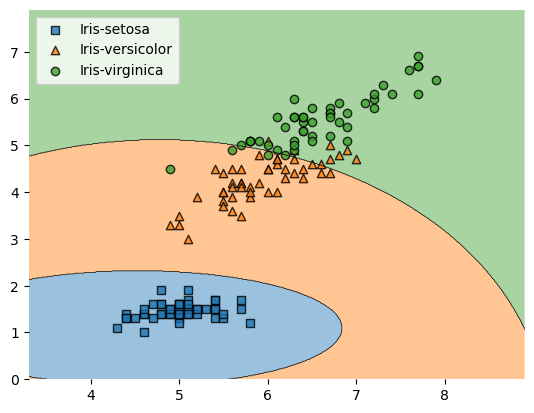

In [150]:
ax = plot_decision_regions(data, data_class, clf=model, legend=0, filler_feature_values={1: 3.045, 3: 1.198667}, filler_feature_ranges={1: 2.2, 3: 2.4})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()